<a href="https://colab.research.google.com/github/BimaPancara/blob/College/Pemrograman Lanjut/tugasRegresiLinearMultilinear/pemrogramanLanjut3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PERTEMUAN 3**
09/10/2023

## Jenis Machine Learning

### Supervised Learning
Tipe Pengembangan _Machine learning_ yang menggunakan dataset yang sudah diberi label.
Harus ada referensi
1. Regression
1. Classification
1. Naive Bayes
1. Artificial Neural Network: Multi Layer Perceptron and Probabilistic Neural Networks
1. Support Vector Machine



#### 1. Regression Learning

Teknik mencari hubungan antara _variable dependent_ (ingin diketahui) dengan _variable independent_ (diketahui). Jenis Regression Learning =
* Simple Linear Regression
* x
* x

##### Regresi Linear Sederhana




In [16]:
# Import Library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Immport dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasetLinear.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

# Membagi data menjadi training set dan Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

# Fitting Regresi Linear Sederhana terhadap Training Test
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Memprediksi Hasil Test Set
y_pred = regressor.predict(x_test)

Plot dengan Matplotlib

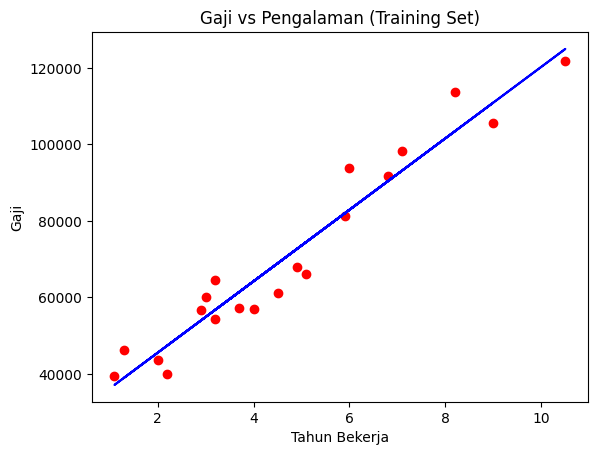

In [17]:
# Visualisasi hasil Training Set
plt.title('Gaji vs Pengalaman (Training Set)')
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.xlabel('Tahun Bekerja')
plt.ylabel('Gaji')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

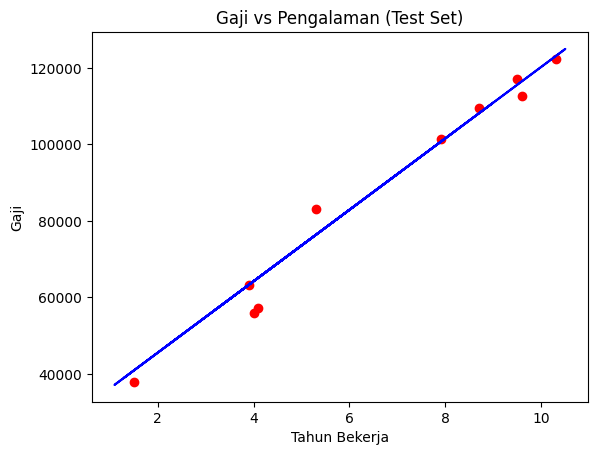

In [18]:
# Visualisasi hasil Test Set
plt.title('Gaji vs Pengalaman (Test Set)')
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.xlabel('Tahun Bekerja')
plt.ylabel('Gaji')
plt.show

Regresi Multilinear

In [15]:
#Import Library
import numpy as np
import pandas as pd

# Import Dataset
dataset = pd.read_csv('/content/drive/MyDrive/datasetMultilinear.csv')
X = dataset.iloc[:, :-1].values
Tampilkan_X = pd.DataFrame(X)
y = dataset.iloc[:, 4].values


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(
        [('encoder', OneHotEncoder(), [3])],
        remainder='passthrough')
X = np.array(transformer.fit_transform(X), dtype=float)

X = X[:, 1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

import statsmodels.api as sm
X_new = sm.add_constant(X)
X_opt = X_new[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X_new[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X_new[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X_new[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X_new[:, [0, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

print (regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           3.50e-32
Time:                        02:21:27   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0